<a href="https://colab.research.google.com/github/ritzi12/notebooks_supervised/blob/main/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression Mathematical Algorithm

In this notebook we will see summary of :

1. Mathematical Formulation of Regression using Matrices
2. Verifying coeff from mathematical formulation with sklearn and statsmodel package output
3. Checking and understanding various Regression assumptions using statsmodel api
4. Regularised regression - Ridge & Lasso using Sklearn. And understanding difference between two.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

## Load Data

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/advertising_and_sales_clean.csv') # advertising and sales data
sales.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


## Steps for Multiple Linear Regression Manually

1.	Initialize X data matrix add intercept column of 1s also, Y .
2.	Find regression coeff values using the formula :

 **b = (X' \* X)^-1 \* (X' \* Y)**


In [ ]:
#1. Initialise data matrix, label Y matrix, coeff matrix

intercept = pd.Series(np.ones(shape=(sales.shape[0])),name='intercept')
X = pd.concat([intercept,sales[['tv','radio','social_media']]],axis=1);
Y = sales[['sales']];
b = np.zeros(shape=(4,1));


In [ ]:
#2. Find Regression Coeff

a1 = np.linalg.inv(np.matmul(np.transpose(X),X));
a2 = np.matmul(np.transpose(X),Y)
b = np.matmul(a1,a2)
display(b);



<ipython-input-26-4b5f41064e52>:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  a1 = np.linalg.inv(np.matmul(np.transpose(X),X));
<ipython-input-26-4b5f41064e52>:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep t

,0
0,-133.962968
1,3.562570
2,-0.003970
3,0.004964


## MLR Using Python Sklearn

We verify our manual MLR regression coeff values using python regression coeff from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
X_data = X.drop(['intercept'],axis=1)
reg.fit(X_data,Y)
r_sq = reg.score(X_data,Y) #R square Values
print("Reg Intercept : ",reg.intercept_)
print("Reg Coeff : ",reg.coef_)
print("Reg R squared value : ",r_sq)

Reg Intercept :  [-133.96296784]
Reg Coeff :  [[ 3.56256963 -0.00397038  0.00496396]]
Reg R squared value :  0.9989950218000194


## MLR Using Python StatsModel API


We verify our manual MLR regression coeff values using python regression coeff from statsmodel package. We get same coefficients and intercepts.

In [ ]:

X = sales[['tv','radio','social_media']]
Y = sales[['sales']];
X = sm.add_constant(X);
model = sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        03:51:37   Log-Likelihood:                -42769.
No. Observations:                4546   AIC:                         8.555e+04
Df Residuals:                    4542   BIC:                         8.557e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -133.9630    102.820     -1.303      0.193    -335.541      67.615
tv               3.5626      0.003   1051.118      0.000       3.556       3.569
radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
social_media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Checking Regression Assumptions

1. Linear Relationship between predictors and response.  - **Partial Reg Plots , Residuals vs Fitted Values , CCPR**

2. Autocorrelation of Error - **Durbin-Watson** statistic.

3. Normality of errors -  **Jarque-Bera Test, Omnibus test**

3. Homoskedasticity - Constant Variance of Error terms-  **Fitted vs Residuals**

4. Outliers - **Studentized Residuals vs fitted values.**

5. High Leverage Points - **Influence Plots,Cooks' Distance**

    To identify values with high influence, we look for observations with:

    * big blue points (high Cook’s distance) and
    * high leverage (X-axis) which additionally have
    * high or low studentized residuals (Y-axis

7. Multicollinearity - **Correlation Matrix, VIF (Variance Inflation Factor)**

In [ ]:
#Load Data
diab = pd.read_csv('diabetes_clean.csv') # diabetes  data
diab.info();

X = diab.drop(['glucose'],axis=1);
Y = diab[['glucose']];
X = sm.add_constant(X);
model = sm.OLS(Y, X).fit()
model.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                glucose   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     49.81
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.07e-64
Time:                        03:57:22   Log-Likelihood:                -3588.2
No. Observations:                 768   AIC:                             7194.
Df Residuals:                     759   BIC:                             7236.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          77.8019      5.196     14.975      0.000      67.603      88.001
pregnancies    -0.4654      0.337     -1.382      0.167      -1.126       0.196
diastolic       0.1180      0.053      2.232      0.026       0.014       0.222
triceps        -0.2886      0.072     -4.032      0.000      -0.429      -0.148
insulin         0.0901      0.009      9.807      0.000       0.072       0.108
bmi             0.3075      0.139      2.214      0.027       0.035       0.580
dpf             1.6934      2.950      0.574      0.566      -4.097       7.484
age             0.4840      0.099      4.871      0.000       0.289       0.679
diabetes       25.0380      2.179     11.493      0.000      20.761      29.315
==============================================================================
Omnibus:                       44.865   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.229
Skew:                          -0.185   Prob(JB):                     2.15e-31
Kurtosis:                       5.068   Cond. No.                         850.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Partial Regression Plots

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


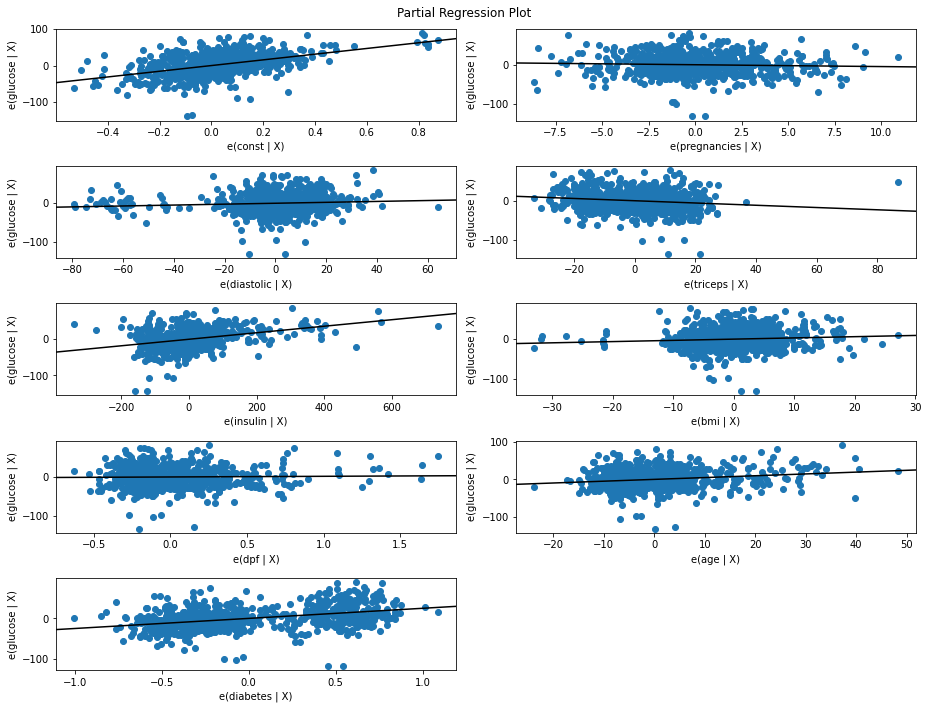

In [ ]:
# modify figure size
fig = plt.figure(figsize=(13, 10))

# creating regression plots
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

eval_env: 1


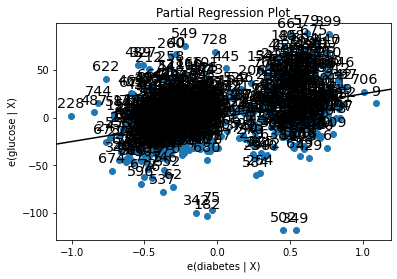

In [ ]:
# Checking influential points using diabetes as VOI
sm.graphics.plot_partregress(
                             endog='glucose', # response
                             exog_i='diabetes', # variable of interest
                             exog_others=['pregnancies','diastolic','triceps','bmi','dpf','age','insulin'], # other predictors
                             data=diab,  # dataframe
                             obs_labels=True # show labels
                             );

eval_env: 1


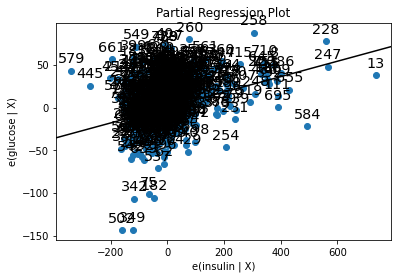

In [ ]:
# Checking influential points using insulin as VOI
sm.graphics.plot_partregress(
                             endog='glucose', # response
                             exog_i='insulin', # variable of interest
                             exog_others=['pregnancies','diastolic','triceps','bmi','dpf','age','diabetes'], # other predictors
                             data=diab,  # dataframe
                             obs_labels=True # show labels
                             );

## Residuals vs Fitted Values

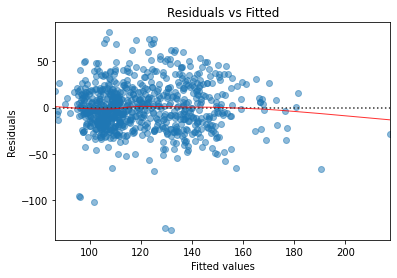

In [ ]:
# fitted values
model_fitted_y = model.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='glucose', data=diab, lowess=True,
                     scatter_kws={'alpha': 0.5},
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');


We observe that the residual vs fitted plot is almost equally distributed with no discernable pattern.

From Partial reg plot we observe that majority of the values are concentrated in middle . Diabetes, age,insulin show somewhat positive relation with response variable.

## Durbin-Watson Statistic



*   DW =2 - No autocorrelation
*   0<DW<2 - Positive Correlation
*   2<DW<4 - Negative Correlation

From Statsmodel output we can see we have got DW~2 which implies theres no autocorrelation


## Non Normally Distributed Errors

### Jarque-Bera test
The Jarque–Bera (JB) test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.

The null hypothesis (
H
0
) is a joint hypothesis of:

* the skewness being zero and
* the kurtosis being 3.

We see p-value is less than 0.05 therefore null hypothesis is rejected errors are non normally distributed but kurtosis is almost 3.

In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.jarque_bera(model.resid)

list(zip(name, test)) #this is also present in regression model summary


[('Jarque-Bera', 10.022050693140063),
 ('Chi^2 two-tail prob.', 0.006664066823912008),
 ('Skew', 0.2893100318135974),
 ('Kurtosis', 2.966332774493365)]

## Outlier Analysis - Studentized Residuals

The studentized residuals, computed by dividing each residual ei by its estimated standard error  Observations whose studentized residuals are greater than 3 in absolute values are possible outliers.

> **studentized residual = residual / (standard deviation of residuals * (1 - hii)^(1/2))**



"hii" refers to the leverage factor for each data point.


Text(0, 0.5, 'Studentized Residuals')

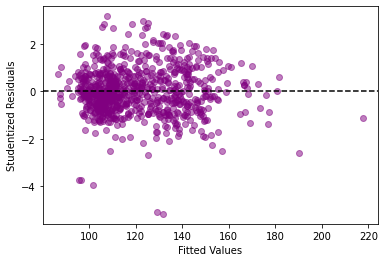

In [ ]:
#calculate studentized residuals
stud_res = model.outlier_test()

x = model.fittedvalues
y = stud_res['student_resid']

plt.scatter(x, y, color='purple',alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')

In above plot few datapoints are beyond -3 they can be considered as outliers and removed


In [ ]:
stud_res[abs(stud_res['student_resid'])>3]

,student_resid,unadj_p,bonf(p)
75,-3.719779,2.141175e-04,0.164442
182,-3.948140,8.609347e-05,0.066120
342,-3.746760,1.927325e-04,0.148019
349,-5.169040,3.012665e-07,0.000231
502,-5.073411,4.918590e-07,0.000378
549,3.156838,1.658041e-03,1.000000


In [ ]:
diab_out = diab[abs(stud_res['student_resid'])<3]
diab_out.shape

(762, 9)

In [ ]:
# Elimination of outliers res
X = diab_out.drop(['glucose'],axis=1);
Y = diab_out[['glucose']];
X = sm.add_constant(X);
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                glucose   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     55.64
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           5.34e-71
Time:                        03:57:49   Log-Likelihood:                -3507.0
No. Observations:                 762   AIC:                             7032.
Df Residuals:                     753   BIC:                             7074.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          79.4579      4.860     16.349      0.000      69.917      88.999
pregnancies    -0.5083      0.314     -1.618      0.106      -1.125       0.108
diastolic       0.1015      0.050      2.050      0.041       0.004       0.199
triceps        -0.2425      0.067     -3.618      0.000      -0.374      -0.111
insulin         0.0837      0.009      9.728      0.000       0.067       0.101
bmi             0.3179      0.130      2.451      0.014       0.063       0.573
dpf             0.7868      2.755      0.286      0.775      -4.622       6.195
age             0.4727      0.093      5.098      0.000       0.291       0.655
diabetes       25.9161      2.036     12.729      0.000      21.919      29.913
==============================================================================
Omnibus:                       13.295   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.486
Skew:                           0.314   Prob(JB):                      0.00118
Kurtosis:                       3.172   Cond. No.                         852.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that we get slight improvement in our modle by eliminating the 6 datapoints. Observe Rsq value which increased and AIC, BIC values which decreased.

## High Leverage Points - Influence Plots

To identify values with high influence, we look for observations with:

  * big blue points (high Cook’s distance) and
  * high leverage (X-axis) which additionally have
  * high or low studentized residuals (Y-axis)

  Here points 579,445,228,,13 are high leverage points




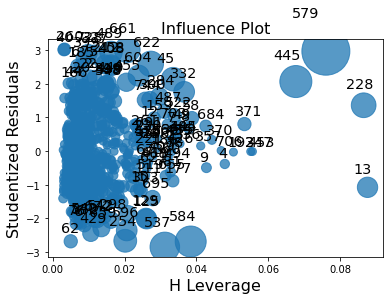

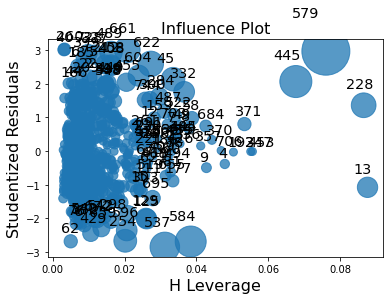

In [ ]:
#fig = plt.figure(figsize=(20, 15))
sm.graphics.influence_plot(model, criterion="cooks")

## Cook's Distance

A general rule of thumb is that observations with a Cook’s distance over
**4/n**
 (where n is the number of observations) are possible outliers with leverage.

In [ ]:
# obtain Cook's distance
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = len(diab_out["glucose"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = model_cooksd > critical_d

# output potential outliers with leverage
print(diab_out.index[out_d], "\n",
    model_cooksd[out_d])


Critical Cooks distance: 0.005249343832020997
Int64Index([  2,  13,  22,  39,  45, 125, 129, 154, 211, 212, 218, 228, 245,
            254, 258, 294, 298, 300, 319, 327, 332, 399, 408, 429, 440, 445,
            455, 489, 495, 498, 510, 537, 542, 548, 579, 584, 596, 604, 622,
            659, 661, 672, 675, 695, 728, 744],
           dtype='int64') 
 [0.00611808 0.01241022 0.0054816  0.00834943 0.01740924 0.01208248
 0.01173004 0.00596117 0.0061975  0.01082541 0.00535015 0.01937664
 0.0057305  0.01614271 0.01193076 0.00885285 0.0076455  0.00719168
 0.00671606 0.01078548 0.01297153 0.0074867  0.01159661 0.00707715
 0.00705765 0.03412677 0.00965078 0.0155393  0.00564718 0.00650186
 0.00595621 0.02875076 0.00586978 0.00647544 0.07940054 0.03179264
 0.01292413 0.01353077 0.02069206 0.00800184 0.02100075 0.00548076
 0.00573554 0.00619811 0.00922179 0.00670103]


## Model after eliminating Outliers and Influential points

We can observe the model improved from .372 to .450 Rsquare value and so did AIC,BIC

In [ ]:
#dropping these outliers
diab_out_lev = diab_out[~out_d]
diab_out_lev.shape

# Elimination of outliers and influential points
X = diab_out_lev.drop(['glucose'],axis=1);
Y = diab_out_lev[['glucose']];
X = sm.add_constant(X);
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                glucose   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     72.24
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.31e-86
Time:                        03:58:05   Log-Likelihood:                -3189.2
No. Observations:                 716   AIC:                             6396.
Df Residuals:                     707   BIC:                             6437.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.2458      4.338     18.500      0.000      71.730      88.762
pregnancies    -0.4708      0.295     -1.598      0.110      -1.049       0.108
diastolic       0.1159      0.045      2.579      0.010       0.028       0.204
triceps        -0.2920      0.062     -4.674      0.000      -0.415      -0.169
insulin         0.1059      0.008     12.492      0.000       0.089       0.123
bmi             0.2600      0.117      2.230      0.026       0.031       0.489
dpf            -2.6896      2.648     -1.016      0.310      -7.888       2.509
age             0.4675      0.088      5.305      0.000       0.294       0.641
diabetes       25.5043      1.839     13.872      0.000      21.895      29.114
==============================================================================
Omnibus:                        9.808   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.022
Skew:                           0.289   Prob(JB):                      0.00666
Kurtosis:                       2.966   Cond. No.                         829.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinearity

Correlation Matrix and Variance Inflation Factor used to identify multicollinearity.

As we can observe from below VIF table there's no problemtic collinearity in our predictors as none of the VIF is beyond 5 .



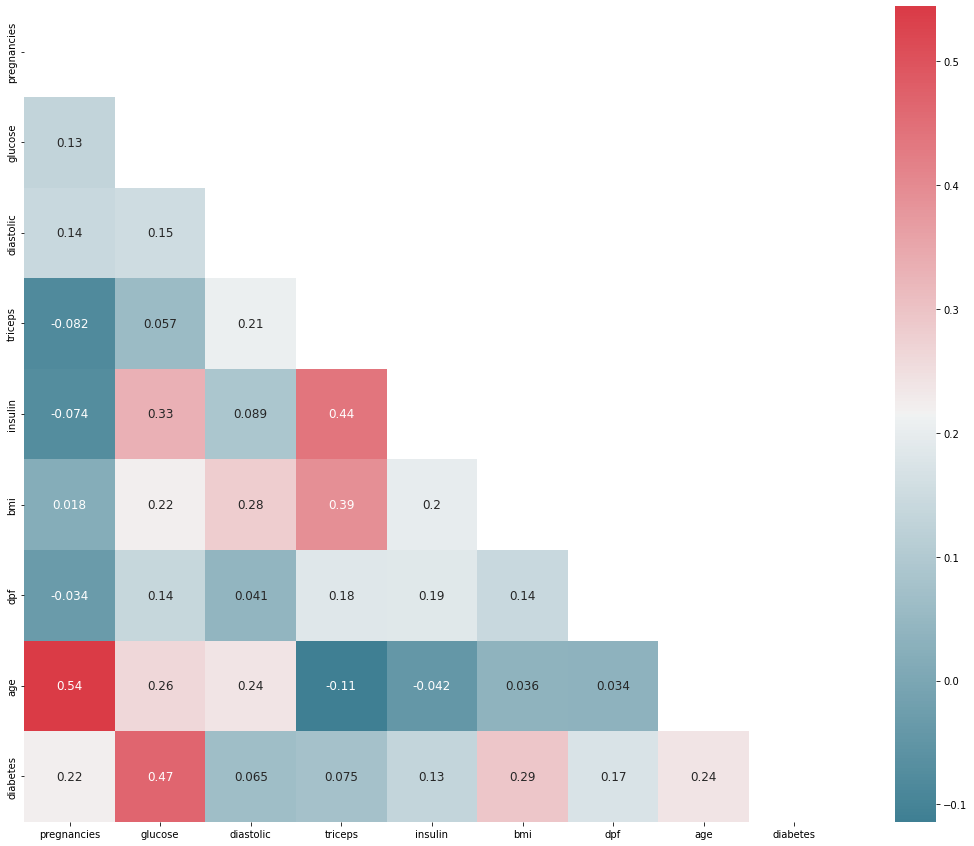

In [ ]:
# Inspect correlation
# Calculate correlation using the default method ( "pearson")
corr = diab.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
fig = plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

       feature        VIF
0        const  30.732764
1  pregnancies   1.537706
2    diastolic   1.200737
3      triceps   1.544259
4      insulin   1.365843
5          bmi   1.370973
6          dpf   1.073978
7          age   1.641668
8     diabetes   1.217312


# Regularised Regression

In order to improve the regression model further in case of high dimensional data we can use regulrization.

Two types of shrinkage or regularization:
1. Ridge
2. Lasso

 From the graph of model coefficients vs alpha values we can see the difference between Ridge and Lasso regression .

 In Ridge regression the coeff never become zero although they might become very small.

 **In Lasso all coefficient value are zero except age, insulin and diabetes which denotes that these 3 features are significant for the model .**


In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Lasso Regression various alpha vlaues
alpha= np.arange(0,5,0.01);
scaler = StandardScaler();

X_reg = X.drop(columns=['const'],axis=1)
X_scaled = scaler.fit_transform(X_reg);

X_train,X_test, Y_train,Y_test = train_test_split(X_scaled,Y,train_size = 0.8,random_state=1200,shuffle=True)

scores = [];
l = ['score','intercept']
l.extend(X_reg.columns);
coeff_mat = pd.DataFrame(columns=l);

for i in range(len(alpha)):
  ridge = Ridge(alpha=alpha[i]);
  ridge.fit(X_train,Y_train);
  values = [];
  values.append(ridge.score(X_test,Y_test));
  values.append(ridge.intercept_[0]);
  values.extend(ridge.coef_[0]);
  coeff_mat.loc[i,]=values;


In [ ]:
coeff_mat

,score,intercept,pregnancies,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,0.526634,118.912606,-1.423275,2.338293,-4.13242,11.420443,1.418392,-0.934729,4.788552,11.278351
1,0.526631,118.912611,-1.423148,2.338247,-4.132206,11.420156,1.418418,-0.934671,4.788448,11.27816
2,0.526629,118.912615,-1.423021,2.3382,-4.131992,11.41987,1.418443,-0.934613,4.788344,11.27797
3,0.526626,118.91262,-1.422894,2.338154,-4.131778,11.419584,1.418468,-0.934555,4.788241,11.277779
4,0.526624,118.912625,-1.422767,2.338107,-4.131564,11.419298,1.418494,-0.934497,4.788137,11.277589
...,...,...,...,...,...,...,...,...,...,...
495,0.525414,118.914948,-1.361591,2.315678,-4.028366,11.280791,1.430754,-0.90642,4.738058,11.184881
496,0.525412,118.914952,-1.361469,2.315633,-4.02816,11.280513,1.430779,-0.906364,4.737957,11.184694
497,0.525409,118.914957,-1.361347,2.315588,-4.027953,11.280235,1.430803,-0.906308,4.737857,11.184507
498,0.525407,118.914962,-1.361225,2.315543,-4.027747,11.279957,1.430828,-0.906251,4.737757,11.18432


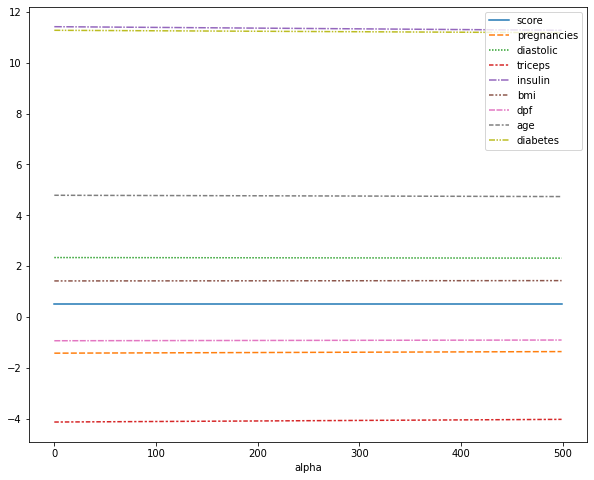

In [ ]:
alp = pd.Series(list(alpha),name='alpha')
coeff_mat.set_index([alp])
coeff_mat_noint = coeff_mat.drop(['intercept'],axis=1);
fig = plt.figure(figsize=(10, 8));
g = sns.lineplot(data=coeff_mat_noint)
g.set_xlabel('alpha')
plt.show()

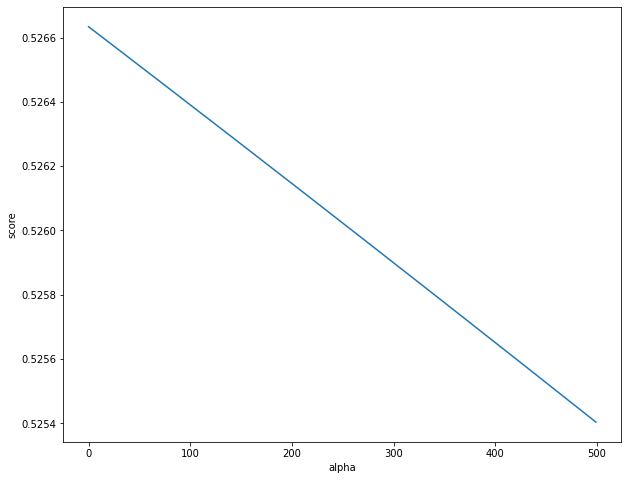

In [ ]:
fig = plt.figure(figsize=(10, 8));
g = sns.lineplot(x=coeff_mat.index,y=coeff_mat['score'])
g.set_xlabel('alpha')
plt.show()

In [ ]:

# Lasso Regression various alpha vlaues
alpha= np.arange(0,5,0.01);
scaler = StandardScaler();

X_reg = X.drop(columns=['const'],axis=1)
X_scaled = scaler.fit_transform(X_reg);

X_train,X_test, Y_train,Y_test = train_test_split(X_scaled,Y,train_size = 0.8,random_state=1200,shuffle=True)

scores = [];
l = ['score','intercept']
l.extend(X_reg.columns);
coeff_mat = pd.DataFrame(columns=l);

for i in range(len(alpha)):
  lasso = Lasso(alpha=alpha[i]);
  lasso.fit(X_train,Y_train);
  values = [];
  values.append(lasso.score(X_test,Y_test));
  values.append(lasso.intercept_[0]);
  values.extend(list(lasso.coef_));
  coeff_mat.loc[i,]=values;


<ipython-input-43-98134b23492b>:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,Y_train);
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+05, tolerance: 4.284e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
coeff_mat

,score,intercept,pregnancies,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,0.526634,118.912606,-1.423275,2.338293,-4.13242,11.420443,1.418392,-0.934729,4.788552,11.278351
1,0.52641,118.913577,-1.39824,2.329647,-4.109619,11.402391,1.408472,-0.921587,4.770047,11.269404
2,0.526185,118.914557,-1.372941,2.321184,-4.087034,11.384353,1.398623,-0.908379,4.75135,11.260405
3,0.525957,118.915536,-1.347642,2.312722,-4.064449,11.366316,1.388775,-0.895172,4.732653,11.251407
4,0.525726,118.916516,-1.322343,2.304259,-4.041863,11.348279,1.378926,-0.881964,4.713956,11.242408
...,...,...,...,...,...,...,...,...,...,...
495,0.3556,119.07742,0.0,0.0,-0.0,5.009471,0.0,0.0,0.450736,8.04492
496,0.355171,119.077701,0.0,0.0,-0.0,4.999526,0.0,0.0,0.44161,8.038319
497,0.354742,119.077982,0.0,0.0,-0.0,4.989581,0.0,0.0,0.432485,8.031718
498,0.354311,119.078263,0.0,0.0,-0.0,4.979636,0.0,0.0,0.423359,8.025117


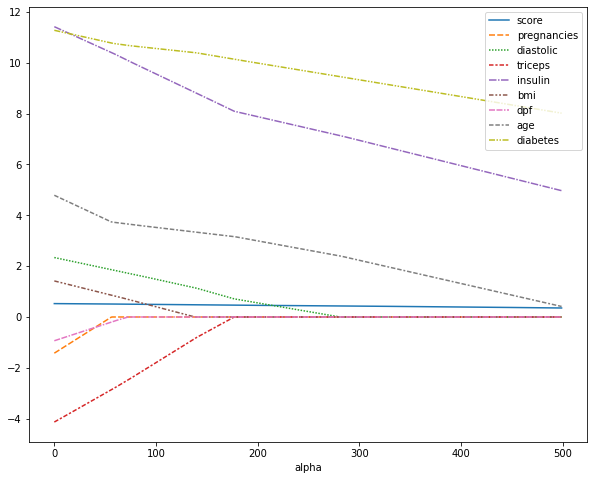

In [ ]:
alp = pd.Series(list(alpha),name='alpha')
coeff_mat.set_index([alp])
coeff_mat_noint = coeff_mat.drop(['intercept'],axis=1);
fig = plt.figure(figsize=(10, 8));
g = sns.lineplot(data=coeff_mat_noint)
g.set_xlabel('alpha')
plt.show()

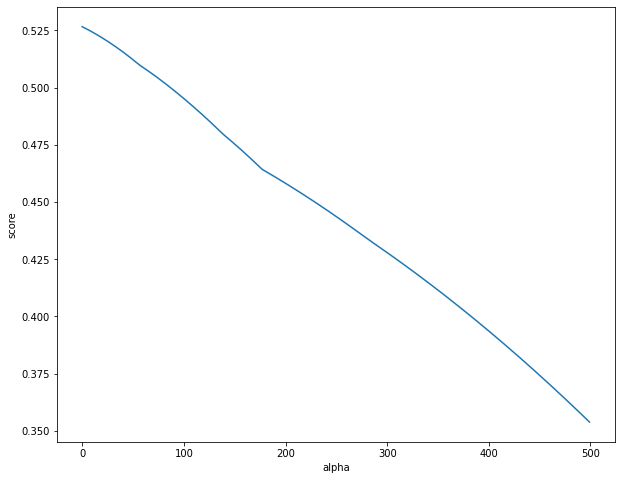

In [ ]:
fig = plt.figure(figsize=(10, 8));
g = sns.lineplot(x=coeff_mat.index,y=coeff_mat['score'])
g.set_xlabel('alpha')
plt.show()

## Conclusion
We improved our initial model performance for diabetes dataset based on **Rsquared value of 0.344 to .526 which is an improvement of 52%**

## Future Work


Using Gridsearch CV for hyperparameter tuning.